---
# Title: Employee Churn Prediction Model
# Author: Dominic Quiazon
---

## Table of Contents
#### 1. About
#### 2. Business Task
#### 3. Import Statements
#### 4. The Data for Analysis
#### 5. Exploratory Data Analysis
#### 6. Model Constuction
#### 7. Model Evaluation
#### 8. Summary and Business Recommendations

## About

The following analysis will predict employee churn while leveraging a supervised machine learning model to determine outcome variable `left`. The dataset presents a variety of features that pertain to Human Resource department materials. 

## Business Task

The goal of the analysis is to train a supervised machine learning model capable of predicting employee churn given the data available. Additionally, it is of importance to dertermine which features are best at predicting employee churn. The benefit of identifying which model and features are relevant to predicting employee churn is that a fictitious employer will be given the capability of foreseeing what factors lead to employee churn and what changes can be made to the company to increase employee retention.

## Import Statements

The following codeblock below details the libraries, modules, functions, and classes that are relevant to conducting exploratory data analysis (EDA), statistical testing, regression analysis, machine learning model building, data visualization, data validation, ensemble learning, cross validation, and model evaluation.

In [1]:
#IMPORT PACKAGES

# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# Max Columns Display
pd.set_option('display.max_columns', None)

## The Data for Analysis

The dataset for analysis is `hr_analytics_df.csv`

The schema is as listed below:

In [2]:
schema = pd.DataFrame(
    {'satisfaction_level':['employee satisfaction level [0-1]'],
     'last_evaluation': ['score of employees last performance review[0-1]'],
     'number_project': ['number of projects the employee is working on'],
     'average_monthly_hours': ['average number of hours an employee works per month'],
     'time_spend_company': ['tenure of employee at company in years'],
     'work_accident': ['if an employee has been in a work accident while working'],
     'left': ['whether or not an employee has left the company'],
     'promotion_left_5_years': ['whether or not an employee has been promoted in last 5 years'],
     'Department': ['the department an employee works under'],
     'salary': ['employee salary in USD']                  
    })
schema

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_left_5_years,Department,salary
0,employee satisfaction level [0-1],score of employees last performance review[0-1],number of projects the employee is working on,average number of hours an employee works per ...,tenure of employee at company in years,if an employee has been in a work accident whi...,whether or not an employee has left the company,whether or not an employee has been promoted i...,the department an employee works under,employee salary in USD


In [3]:
df0 = pd.read_csv('/kaggle/input/hr-analytics-df/HR_analytics_dataset.csv')

## Exploratory Data Analysis

The following codeblocks are intended to reveal insights within the data prior to model building.

In [4]:
# First 5 rows
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Check data types
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Descriptive statistics
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Rename incorrectly spelt columns
df0 = df0.rename(columns= {'Work_accident': 'work_accident',
                           'average_montly_hours': 'average_monthly_hours',
                           'time_spend_company': 'tenure',
                           'Department': 'department'})
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [8]:
# Check for nulls
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

In [10]:
# Drop duplicates
df1 = df0.drop_duplicates(keep='first')
df1.shape

(11991, 10)

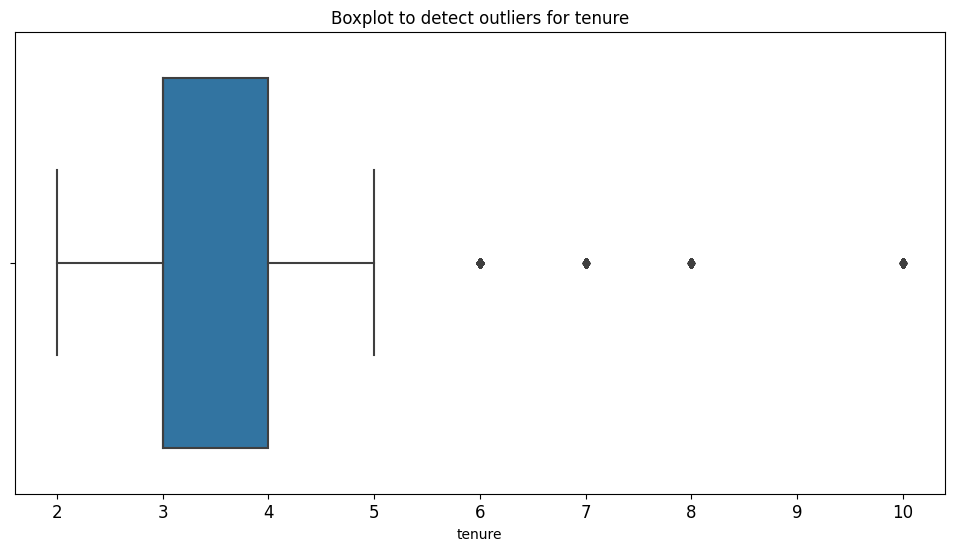

In [11]:
# Distribution of 'tenure' 
# check for outliers in boxplot
plt.figure(figsize=(12,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [12]:
# Compute Interquartile Range to Determine Values that are deemed as outliers

# 25th percentile in 'tenure'
percentile25 = df1['tenure'].quantile(0.25)

# 75th percentile in 'tenure'
percentile75 = df1['tenure'].quantile(0.75)

# Interquartile Range Calculation in 'tenure'
iqr = percentile75 - percentile25

# Upper Limit and Lower Limit for Non-Outlier Values in 'tenure'
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 = 1.5*iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Subset of Data Containing Outliers in 'tenure'
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count of Rows in the Data Containing Outliers in 'tenure'
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [13]:
# Count of Employees who churned and who did not
# counts
print(df1['left'].value_counts())
print()
# percentages
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

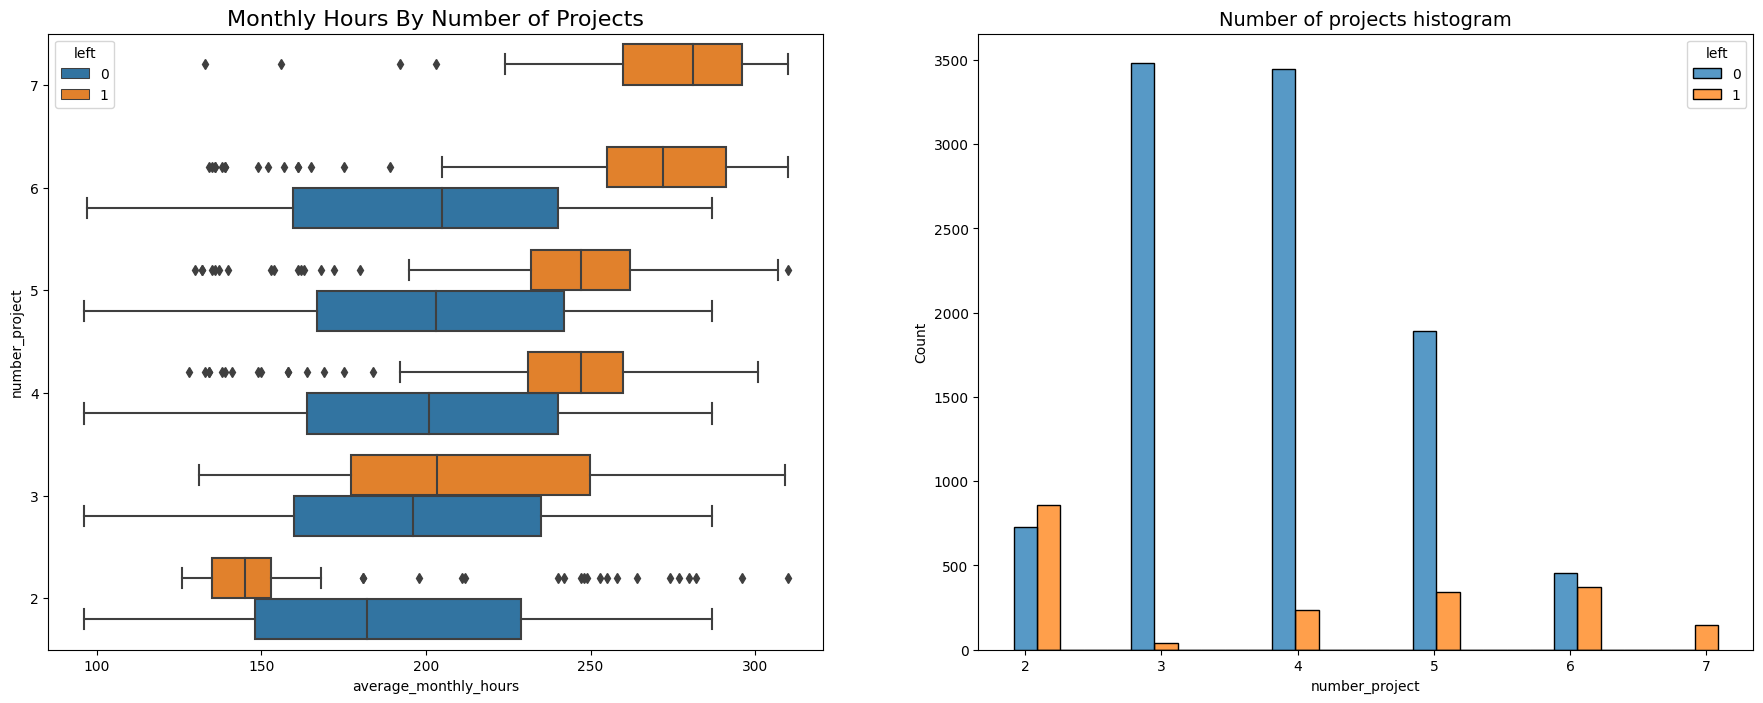

In [14]:
# Average Monthly Hours By Number of Projects
# figsize and axes
fig, ax = plt.subplots(1,2, figsize = (22,8))

# average_monthly_hours by number_projects
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly Hours By Number of Projects', fontsize=16)

# number_projects by left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

The graphic to the left shows an interesting discrepency:
* Employees who churned worked longer hours on average
* Employees who worked one the same amount of projects, but did not churn, worked less hours on average
* Employees who worked less hours than the average with the same number of projects as their peers, tended to churn--this can be a result of getting fired or churning early
* Seemingly, Employees who churned tended to work the highest amount of hours and most amount of projects
* On average, employees who work 50 weeks out of the year at 40 hours a week for 12 months should work at least 166.67 hours per month

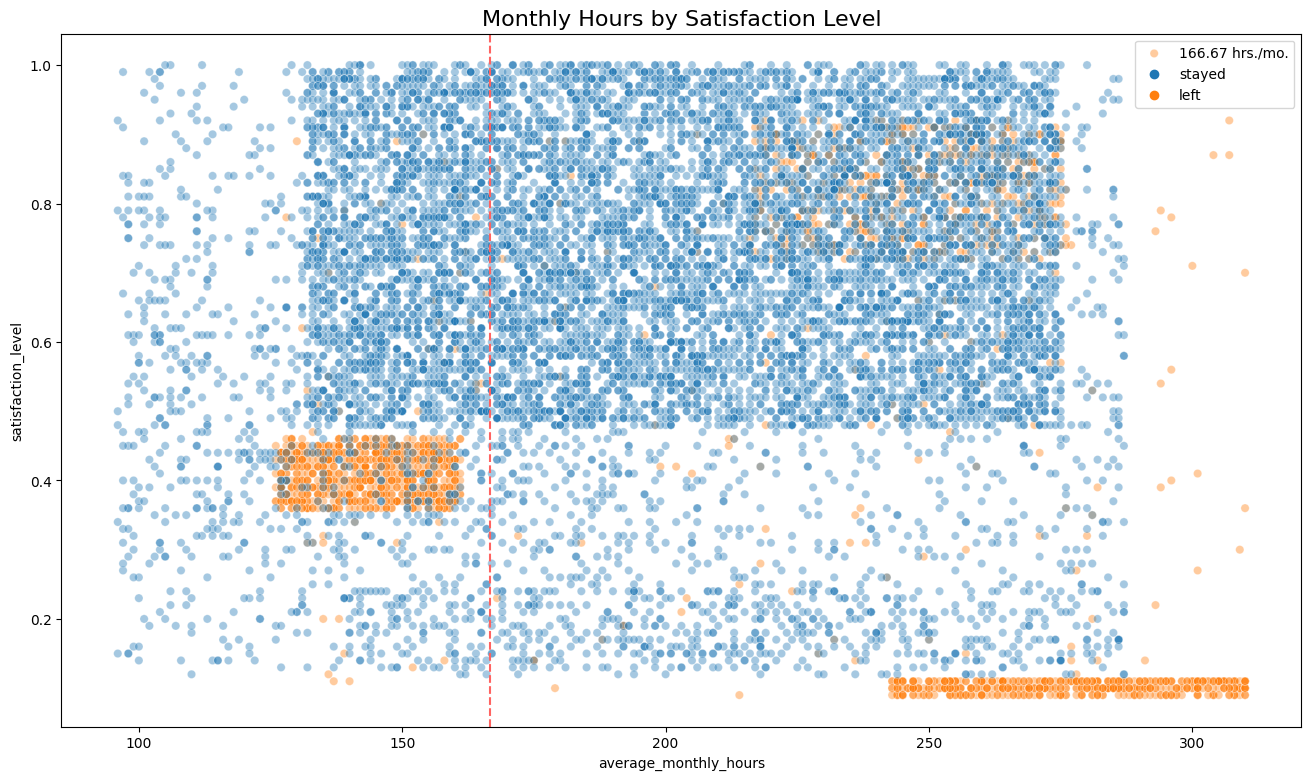

In [15]:
# Average Monthly Hours By Satisfaction Level and Left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly Hours by Satisfaction Level', fontsize='16');

The graphics above displays that those who left and worked the greatest average_monthly_hours churned from the company. This reveals why these employees churned as a result of high monthly hours and low satisfaction levels. Employees who left and worked below average average_monthly_hours are an interesting grouping as it is difficult to determine their reason of churn. One can theorize of their churn, yet it can be a result of pressure to work longer hours, leading to lower satisfaction levels. However, an HR department can further determine their reason of churn.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

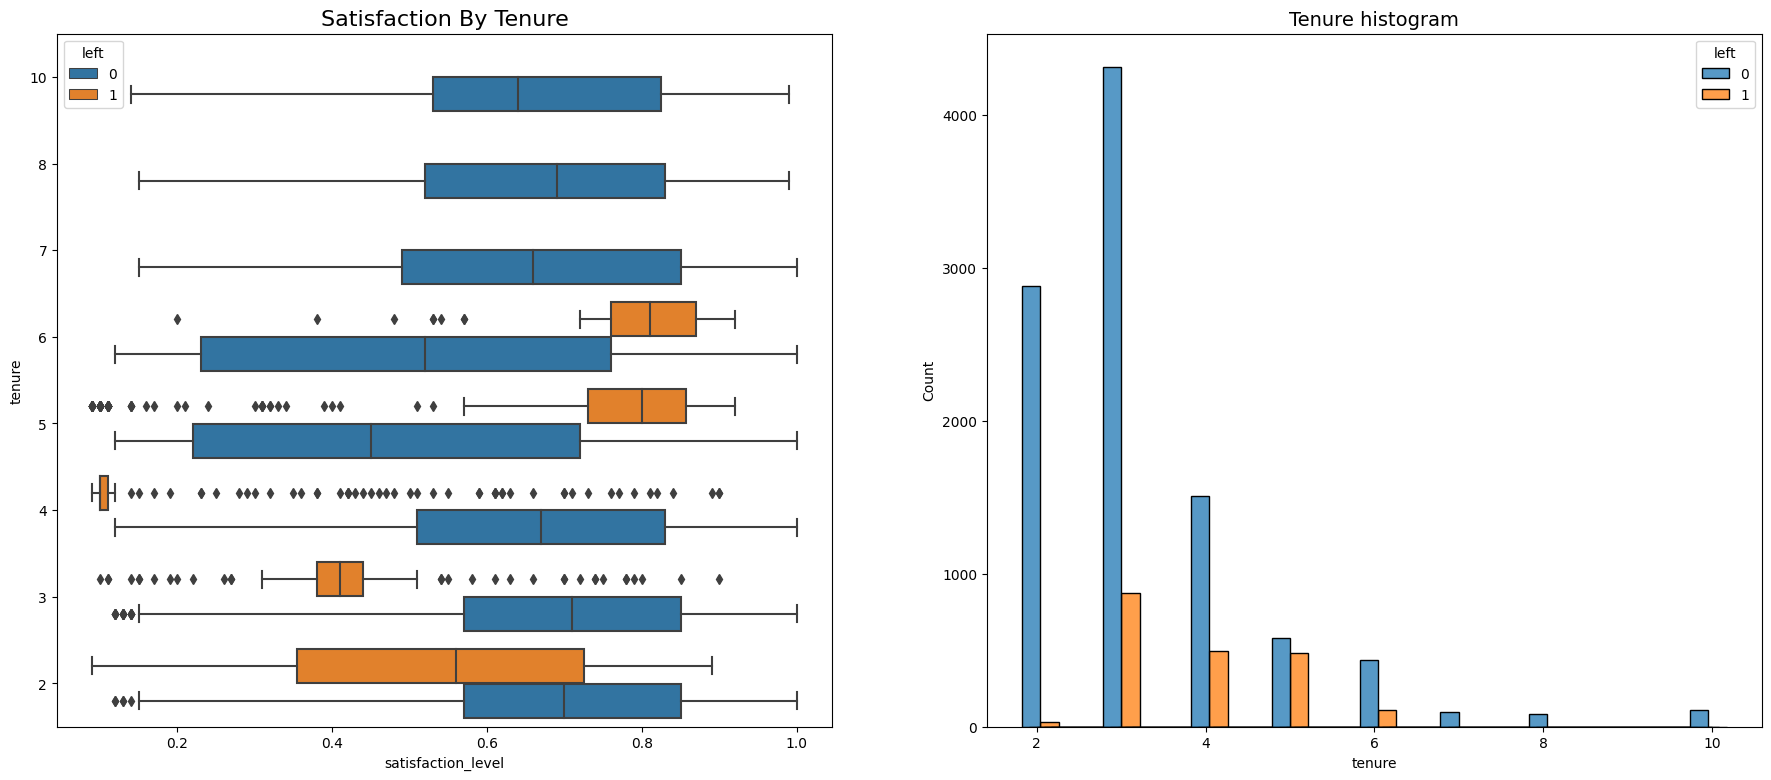

In [16]:
# Satisfaction Level by Tenure
fig, ax = plt.subplots(1, 2, figsize = (22,9))

# Boxplot of Distribution of 'satisfaction_level' by tenure,
    # comparing employeers who stayed vs. those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction By Tenure', fontsize='16')

# Histogram of Distribution of 'tenure', comparing employees who stayed vs. those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

* Employees who worked at the company for 4 years and churned have extememly low satisfaction_level
* Long tenured employees seem to stay at the company
* Employees who worked for 7 years or more seem to never churn

In [17]:
df1.groupby(['left'])['satisfaction_level'].agg(['mean', 'median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


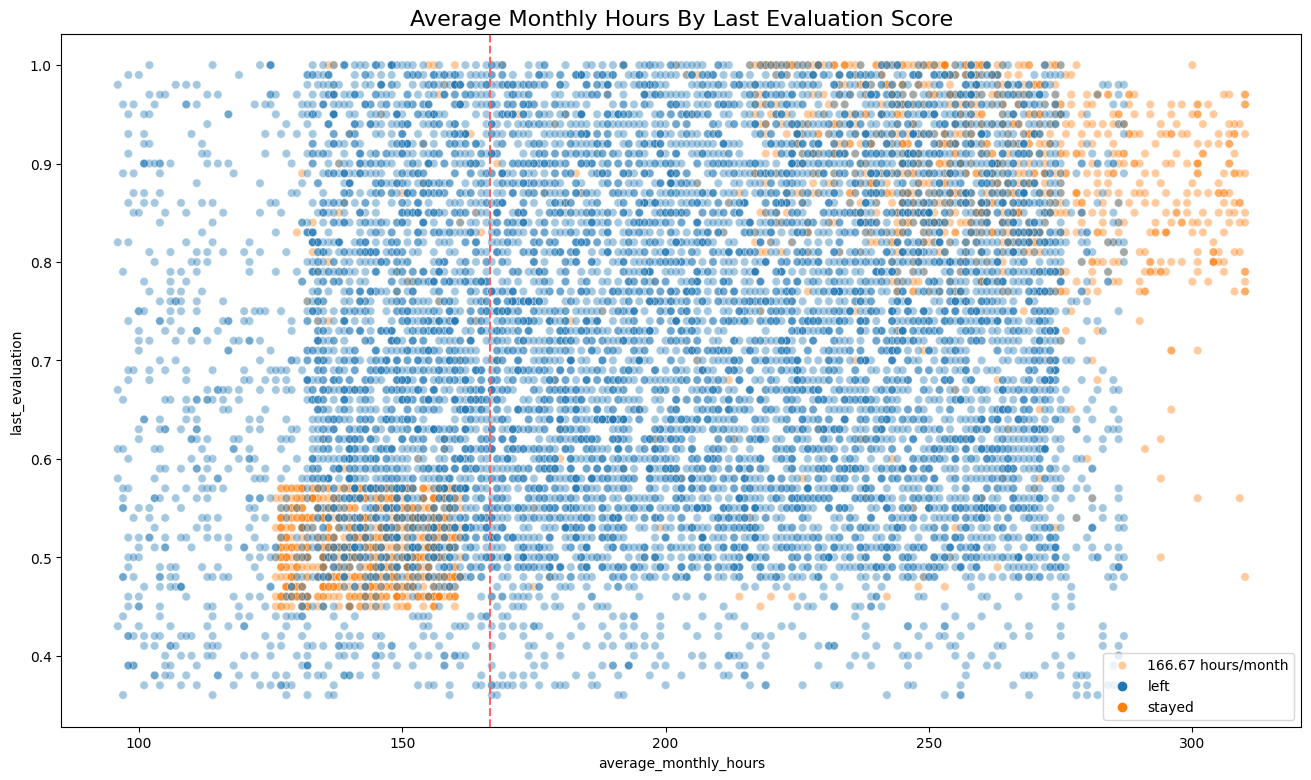

In [18]:
# Average Monthly Hours by Last Evaluation

plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6362', label='166.67 hours/month', ls='--')
plt.legend(labels=['166.67 hours/month', 'left', 'stayed'])
plt.title('Average Monthly Hours By Last Evaluation Score', fontsize='16');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

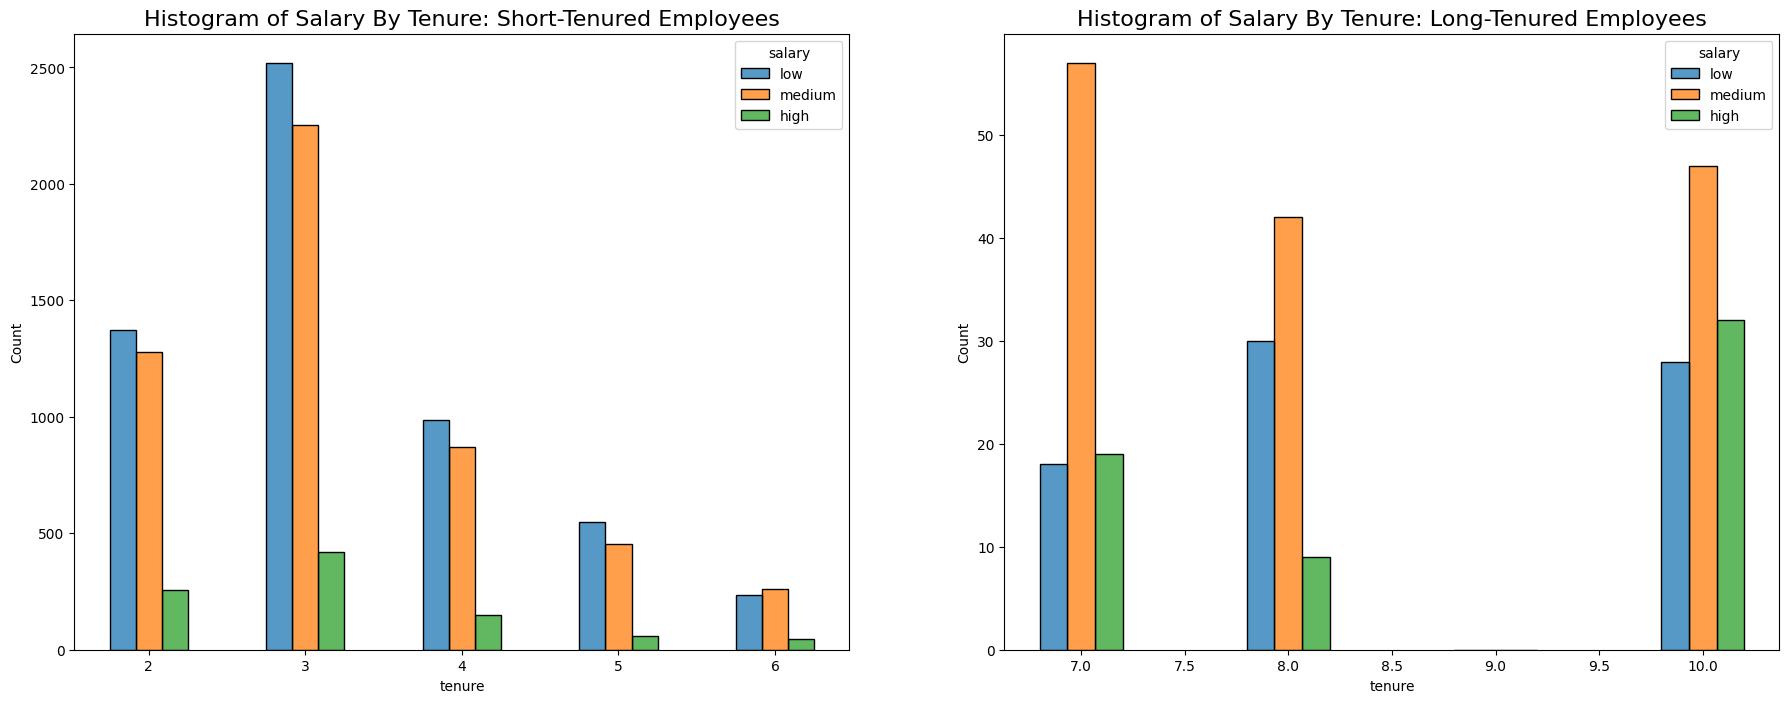

In [19]:
# Salary by Tenure
fig, ax = plt.subplots(1,2, figsize=(22,8))

# Define Short-Tenured Employees
tenure_short = df1[df1['tenure'] < 7]

# Define Long-Tenure Employees
tenure_long = df1[df1['tenure'] > 6 ]

# Plot Short-Tenured Histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium', 'high'],
            multiple='dodge', shrink=0.5, ax=ax[0])
ax[0].set_title('Histogram of Salary By Tenure: Short-Tenured Employees', fontsize='16')

# Plot Long-Tenured Histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Histogram of Salary By Tenure: Long-Tenured Employees', fontsize='16');

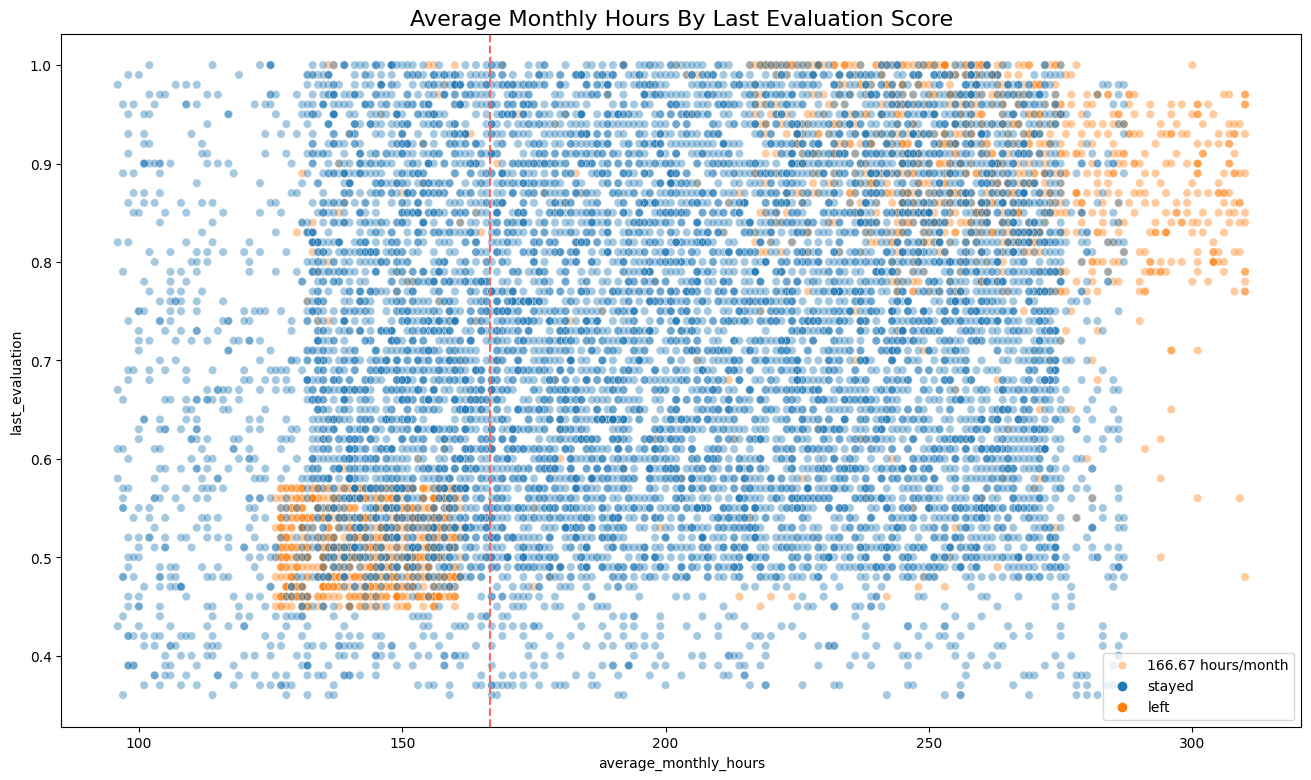

In [20]:
# Average Monthly Hours by Last Evaluation

plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6362', label='166.67 hours/month', ls='--')
plt.legend(labels=['166.67 hours/month', 'stayed', 'left'])
plt.title('Average Monthly Hours By Last Evaluation Score', fontsize='16');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Text(0.5, 1.0, 'Average Monthly Hours By Promotion in Last 5 Years')

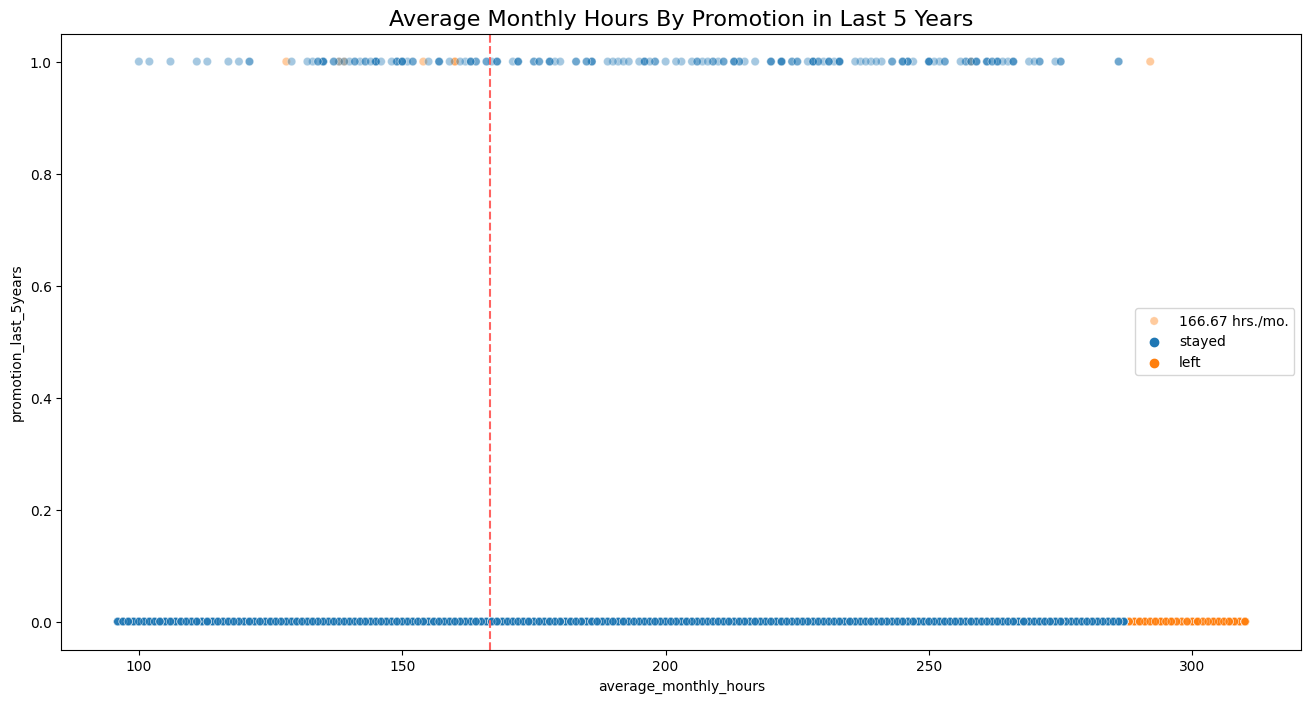

In [21]:
# Average Monthly Hours By Promotion in Last 5 Years
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Average Monthly Hours By Promotion in Last 5 Years', fontsize='16')

* very few employees who were promoted in the last five years left
* very few employees who worked the most hours were promoted
* all of the employees who left were working the longest hours  

In [22]:
# Count of employees in each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 45

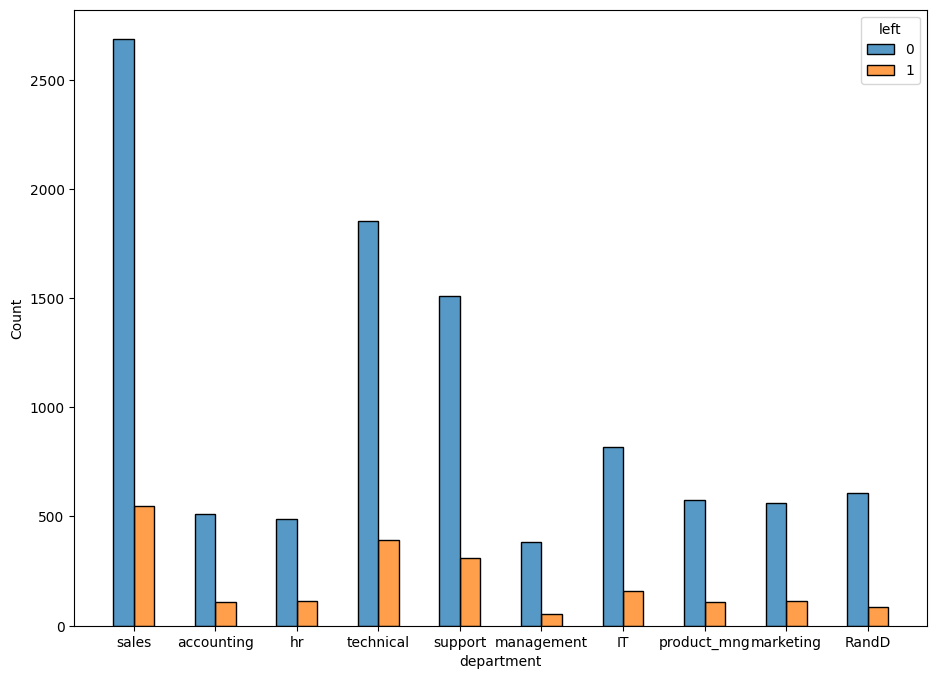

In [23]:
# Distribution of Employees in Each Department By Left Status
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

In [ ]:
# Correlation Heatmap Across Variables
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

## Model Construction

The following codeblocks will be detail the process of constructing a Random Forest Model.

To ease the construction of the model, encoding categorical variables will be employed into the model to ensure accurate predictions.

In [ ]:
# Create copy of Encoded Dataframe
df_enc = df1.copy()

# Encode the 'salary' column as ordinal numeric category
df_enc['salary'] = (
        df_enc['salary'].astype('category')
        .cat.set_categories(['low', 'medium', 'high'])
        .cat.codes
)

# Encode the 'department' column with dummies variables
df_enc = pd.get_dummies(df_enc, drop_first = False)

df_enc.head()

In [ ]:
df_enc['salary'].unique()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
           .corr(), annot=True, cmap='crest')
plt.title('Heatmap of Correlation Between Target Predictor Variables')
plt.show()

In [ ]:
# Bar Chart of Number of Employees By Department, Grouped By Churn or Not
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.ylabel('Employee Count')
plt.xlabel('Department')
plt.title('Counts of Employees Who Stayed or Left By Department', fontsize=16);

In [ ]:
# Isolation of Features
X = df_enc.drop('left', axis=1)

In [ ]:
# Isolation of Outcome/Target Variable
y = df_enc['left']

In [ ]:
# Creation of Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [ ]:
# Instantiate Random Forest Model
rf = RandomForestClassifier(random_state=0)

# Dictionary of Hyperparameters to be applied to model
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500]}

# Dictionary of Scoring Metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch for Cross Validation
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

ROC_AUC will be utilized as the scoring metric to determine the best model as it is a binary classifying scoring metric to distinguish between positive and negative classes while establishing valid cut-off values. A value of 0.8-0.9 would be a great score.

In [ ]:
# Fit Random Forest Model to Training Dataset
%time
rf_cv.fit(X_train, y_train)

In [ ]:
# Best Score of Random Forest Model
rf_cv.best_score_

In [ ]:
# Best Parameters of Random Forest Model
rf_cv.best_params_

In [ ]:
# Function to Extract all Scoring Metrics
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table


# Results of All Scoring Metrics of Random Forest Model
rf_cv_results = make_results('Random Forest CV', rf_cv, 'auc')
rf_cv_results

* The above results of the Random Forest Model returned the scoring metrics of:
    * Precision: 0.950023
    * Recall: 0.915614
    * F1: 0.932467
    * Accuracy: 0.977983
    * ROC/AUC: 0.980425

In [ ]:
# Use Fitted Random Forest Model to Predict Using Test Dataset
y_pred2 = rf_cv.predict(X_test)

In [ ]:
# Confusion Matrix of Logistic Regression Model
rf_cm = confusion_matrix(y_test, y_pred2, labels=rf_cv.classes_)

# Creation of Display for Confusion Matrix
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_cv.classes_)

# Plot of Confusion Matrix for Logistic Regression Model
rf_disp.plot(values_format='')
plt.show()

* The upper-left quadrant displays the number of true negatives.
    * True negatives: The number of people who did not leave that the model accurately predicted did not leave.

* The upper-right quadrant displays the number of false positives.
    * False positives: The number of people who did not leave that the model inaccurately predicted as leaving.
    
* The bottom-left quadrant displays the number of false negatives.
    * False negatives: The number of people who left that the model inaccurately predicted did not leave
    
* The bottom-right quadrant displays the number of true positives.
    * True positives: The number of people who left that the model accurately predicted as leaving

In [ ]:
# Function to Extract Scoring Metrics From Test Dataset

def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model': [model_name],
                          'Precision': [precision], 
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy],
                          'ROC/AUC': [auc]
                         })
  
    return table

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

In [ ]:
# Test Data Results with Random Forest
rf_cv_test_scores = get_scores('Random Forest Test Data Scores', rf_cv, X_test, y_test)
rf_cv_test_scores

In [ ]:
# Random Forest Feature Importance

# Get feature importances
feat_impt = rf_cv.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_cv.best_estimator_.feature_importances_,-10)[-10:]

# Get column labels of top 10 features 
feat = X.columns

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)
                      
y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest Cross Validated: Feature Importances for Employee Churn Prediction", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

* Top 5 Features that Predict Employee Churn
    * satisfaction_level
    * number_project
    * last_evaluation
    * tenure
    * average_monthly_hours

## Summary and Business Recommendations

#### Summary

The following analysis examined the data and its each of its features through the exploratory data analysis (EDA) process. EDA enabled the analysis to realize the distributions of each feature, identify outliers, count the number of occurences with each feature, and reveal correlations across variables. The Random Forest Machine Learning model was applied to the analysis as it was deemed as best suited to conduct the task of predicting employee churn given the values within the HR analytics dataset. Random Forest was leveraged as it applies bootstrap aggregation with randomly selected features and ensemble learning into its process to account for each decision node present in each tree. The final result enabled the realization of a ROC/AUC score of 0.95 and over 0.90 across all other scoring metrics

#### Business Recommendations

The model's output and the outline feature importances identified that employees who churned/left were those who were overworked (long average_monthly_hours) and had low satisfaction_level.

To increase employee retention, the company must consider:
* Conduct further investigation on why employees who work 5 years or less seem to churn so frequently
* Reward employees with promotions, as most employees never receive promotions while working for 5 years or more
* Offer over-time incentives to reward employees who exceed working hours greater than the national average of 166.67 hours per month
* Consider a new scoring system for employee evaluations, as churned employees who work intensive hours and manage multiple projects seem to have low evaluation scores
* Limit the number of projects assigned to employees
* Employ procedures or re-establish company culture so all associates' have an understanding of the work they are being assigned